In [2]:
import time
import os
import cv2
from matplotlib import pyplot as plt
from skimage import feature
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
# Load an color image in grayscale
imgs = []
directory = './temp2/'
test_count = len([name for name in os.listdir(directory) if os.path.isfile(directory+name)])

for i in range(1,test_count + 1):
    imgs.append(cv2.imread('./temp2/test'+str(i)+'.JPG'))
    imgs[i-1] = cv2.cvtColor(imgs[i-1], cv2.COLOR_BGR2GRAY)

In [4]:
# Load an color image in grayscale
imgs_1 = []
directory = './temp2/1/'
count_1 = len([name for name in os.listdir(directory) if os.path.isfile(directory+name)])
for i in range(1,count_1+1):
    imgs_1.append(cv2.imread('./temp2/1/'+str(i)+'.PNG'))
    imgs_1[i-1] = cv2.cvtColor(imgs_1[i-1], cv2.COLOR_BGR2GRAY)
directory = './temp2/2/'
count_2 = len([name for name in os.listdir(directory) if os.path.isfile(directory + name)])
imgs_2 = []
for i in range(1,count_2+1):
    imgs_2.append(cv2.imread('./temp2/2/'+str(i)+'.PNG'))
    imgs_2[i-1] = cv2.cvtColor(imgs_2[i-1], cv2.COLOR_BGR2GRAY)
imgs_3 = []
directory = './temp2/3/'
count_3 = len([name for name in os.listdir(directory) if os.path.isfile(directory+name)])

for i in range(1,count_3+1):
    imgs_3.append(cv2.imread('./temp2/3/'+str(i)+'.PNG'))
    imgs_3[i-1] = cv2.cvtColor(imgs_3[i-1], cv2.COLOR_BGR2GRAY)


In [5]:
# import the necessary packages
from skimage import feature
import numpy as np
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        start = time.time()
        # to build the histogram of patterns
#         lbp = feature.local_binary_pattern(image, self.numPoints,
#             self.radius, method="default")
        lbp = lbp_custom(image)
        print("lbp time", time.time() - start)
        start = time.time()

        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
        print("histogram time", time.time() - start)
        start = time.time()
        # normalize the histogram
        
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        print("normalization time", time.time() - start)
        start = time.time()
        return hist

In [ ]:
# initialize the local binary patterns descriptor along with
# the data and label lists
desc = LocalBinaryPatterns(24, 8)
data = []
labels = []

# loop over the training images
for img in imgs_1:
	# load the image, convert it to grayscale, and describe it
	hist = desc.describe(img)
	# extract the label from the image path, then update the
	# label and data lists
	labels.append("1")
	data.append(hist)
for img in imgs_2:
	# load the image, convert it to grayscale, and describe it
	hist = desc.describe(img)
	# extract the label from the image path, then update the
	# label and data lists
	labels.append("2")
	data.append(hist)
for img in imgs_3:
	# load the image, convert it to grayscale, and describe it
	hist = desc.describe(img)
	# extract the label from the image path, then update the
	# label and data lists
	labels.append("3")
	data.append(hist)


In [40]:
# train a Linear SVM on the data
# model = LinearSVC(random_state = 0)
# model.fit(data, labels)
start_time = time.time()
model = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
model.fit(data, labels)
end_time = time.time()
print(end_time - start_time)

0.006997585296630859


lbp time 1.790996789932251
histogram time 0.009002208709716797
normalization time 0.000997304916381836


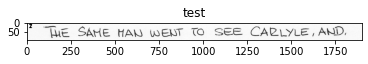

lbp time 1.5210018157958984
histogram time 0.007997274398803711
normalization time 0.0


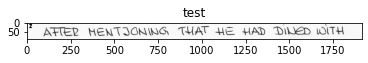

lbp time 1.488999605178833
histogram time 0.007002830505371094
normalization time 0.0


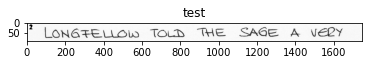

lbp time 1.5770034790039062
histogram time 0.009993314743041992
normalization time 0.0


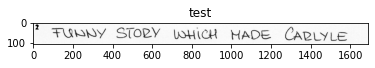

lbp time 1.4699995517730713
histogram time 0.006999492645263672
normalization time 0.0


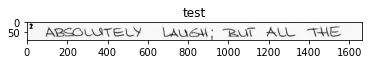

lbp time 1.7530035972595215
histogram time 0.011999368667602539
normalization time 0.0


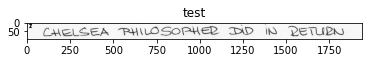

lbp time 1.546994924545288
histogram time 0.00699925422668457
normalization time 0.0


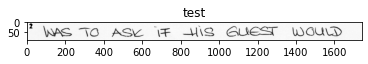

lbp time 0.9989988803863525
histogram time 0.006004810333251953
normalization time 0.0


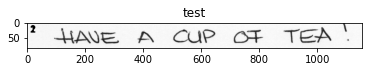

In [41]:
# loop over the testing images
for image in imgs:
    hist = desc.describe(image)
    prediction = model.predict(hist.reshape(1, -1))
    # display the image and the prediction
    cv2.putText(image, prediction[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 0, 255), 3)
    plt.imshow(image,cmap='Greys_r')
    plt.title('test')
    plt.show()

In [6]:
from multiprocessing import Pool
img_lbp = 0
def lbp(i):
    global img_lbp
    for j in range(0, width): 
        img_lbp[i, j] = lbp_calculated_pixel(image, i, j) 

def lbp_custom(image):
    global img_lbp
    height, width = image.shape 
    img_lbp = np.zeros((height, width), 
                   np.uint8)
    pool = Pool(os.cpu_count())
    pool.map(lbp, range(0, height))
    pool.join()
    pool.close()
    return img_lbp



In [7]:

      
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        # If local neighbourhood pixel  
        # value is greater than or equal 
        # to center pixel values then  
        # set it to 1 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        # Exception is required when  
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass
      
    return new_value 
   
# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y, r = 3): 
   
    center = img[x][y] 
   
    val_ar = [] 
      
    # top_left 
    val_ar.append(get_pixel(img, center, x-r, y-r)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-r, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-r, y + r)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + r)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + r, y + r)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + r, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + r, y-r)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-r)) 
       
    # Now, we need to convert binary 
    # values to decimal 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val 